<a href="https://www.kaggle.com/code/mariajtalaka/exoplanets?scriptVersionId=145791113" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data = pd.read_csv('/kaggle/input/nasaexoplanets/cleaned_5250.csv')

<Axes: xlabel='planet_type', ylabel='count'>

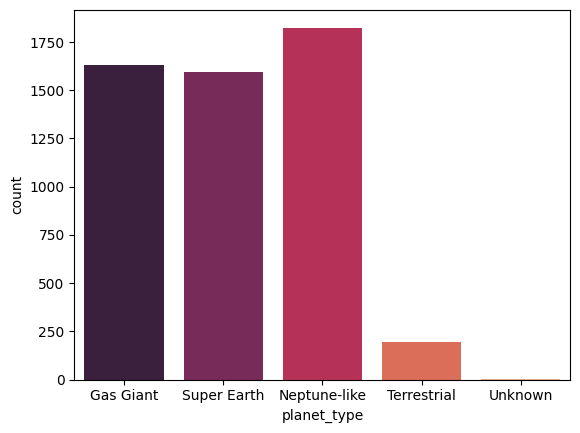

In [3]:
sb.countplot(x='planet_type', data=data, palette="rocket")

In [4]:
planet_type_dict = {}
[planet_type_dict.update({x : idx}) for idx, x in enumerate(np.unique(data['planet_type']))] 
mass_wrt_dict = {}
[mass_wrt_dict.update({x : idx}) for idx, x in enumerate(np.unique(data['mass_wrt'].astype('str')))]
radius_wrt_dict = {}
[radius_wrt_dict.update({x : idx}) for idx, x in enumerate(np.unique(data['radius_wrt'].astype('str')))]
detection_method_dict = {}
[detection_method_dict.update({x : idx}) for idx, x in enumerate(np.unique(data['detection_method'].astype('str')))]

y = data['planet_type']
data['planet_type'] = data['planet_type'].map(planet_type_dict)
data['mass_wrt'] = data['mass_wrt'].map(mass_wrt_dict)
data['radius_wrt'] = data['radius_wrt'].map(radius_wrt_dict)
data['detection_method'] = data['detection_method'].map(detection_method_dict)
data.drop(columns={'name'}, inplace=True)

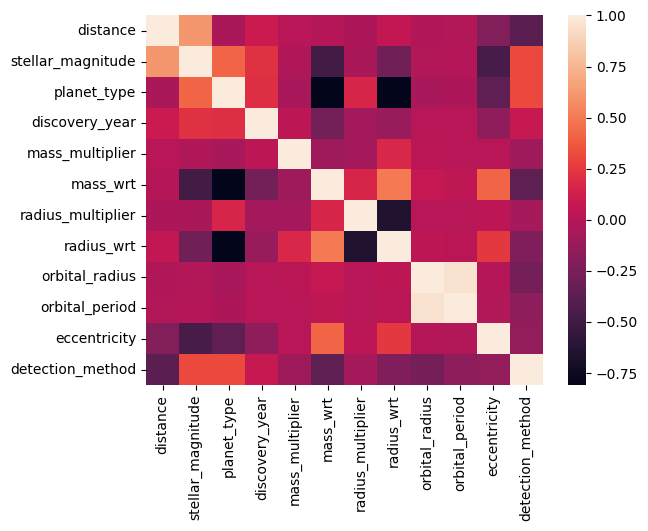

In [5]:
correlation = sb.heatmap(data.corr())
plt.show()

In [6]:
data['planet_type'] = y
data.dropna(axis=0, inplace=True)
data.reset_index(inplace=True)

In [7]:
list_of_number_columns = ['distance', 
                          'stellar_magnitude', 
                          'mass_multiplier', 
                          'radius_multiplier', 
                          'orbital_radius', 
                          'orbital_period', 
                          'eccentricity']


scaler = StandardScaler()
scaled = pd.DataFrame(scaler.fit_transform(data[list_of_number_columns].to_numpy()), columns=list_of_number_columns)

In [8]:
scaled['discovery_year'] = data['discovery_year'].astype('str')
scaled['mass_wrt'] = data['mass_wrt']
scaled['radius_wrt'] = data['radius_wrt']

In [9]:
train_X, test_X, train_Y, test_Y = train_test_split(scaled.to_numpy(), data['planet_type'], stratify=data['planet_type'])

In [10]:
knn = KNeighborsClassifier()
knn.fit(train_X, train_Y)

KNeighborsClassifier()

In [11]:
predicted = knn.predict(test_X)
print(f"accuracy : {accuracy_score(test_Y, predicted)}")
print(f"recall : {recall_score(test_Y, predicted, average='weighted')}")
print(f"precision : {precision_score(test_Y, predicted, average='weighted')}")

accuracy : 0.9312080536912751
recall : 0.9312080536912751
precision : 0.9307694568103506


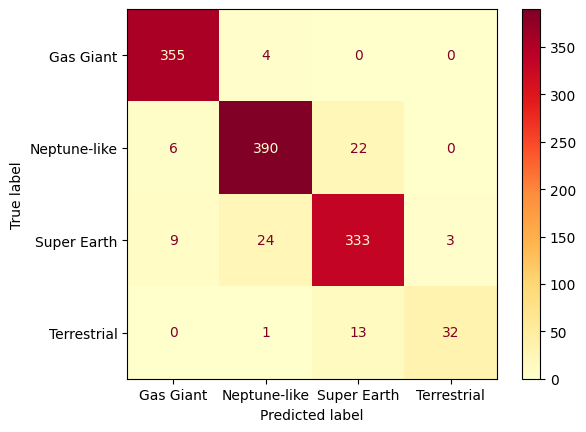

In [12]:
disp = ConfusionMatrixDisplay.from_estimator(knn, test_X, test_Y, cmap=plt.cm.YlOrRd)
plt.show()